load the image → show the grayscale image

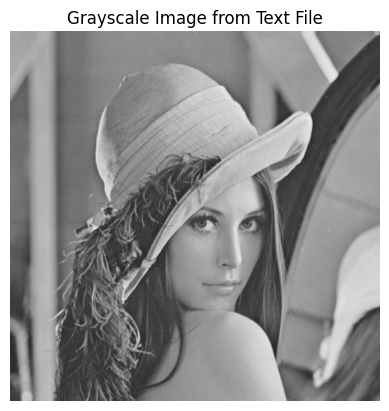

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite("grayscale_output.png", image)
#show the grayscale image
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image from Text File")
plt.axis('off')
plt.show()


make a text file that saved the pixels, each pixel in a line

In [3]:
import numpy as np

# Ensure NumPy prints the full array
np.set_printoptions(threshold=np.inf)

#print(image)
# Flatten the image into a 1D stream
pixel_stream = image.flatten()

# Save as a text file, one value per line (decimal)
np.savetxt('pixel_data.txt', pixel_stream, fmt='%d')


make a text file (config.txt) that contains: threshold, image_width, image_height, total_pixel and 4 kernels

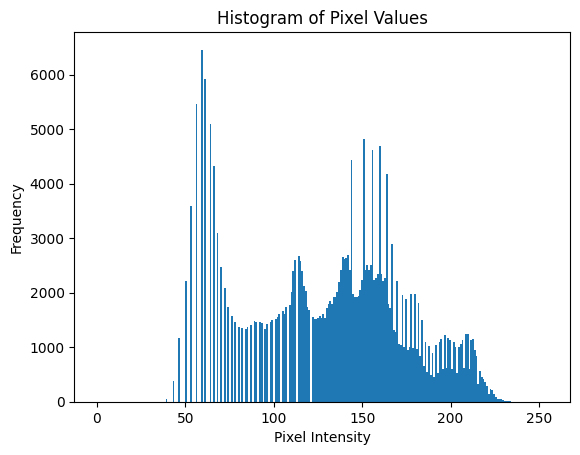

config.txt created successfully!


In [7]:
import matplotlib.pyplot as plt
import cv2

plt.hist(image.ravel(), bins=256, range=(0, 255))
plt.title("Histogram of Pixel Values")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

otsu_value, _ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
threshold = int(otsu_value)



otsu_value, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img_size_w = image.shape[1]
img_size_h= image.shape[0]
total_pixel = img_size_w*img_size_h

# Configuration values with comments
config_data = [
    (threshold,      "Threshold"),
    (img_size_w,      "Image width"),
    (img_size_h,      "Image height"),
    (total_pixel,   "Total pixels"),
    (0,        "Kernel1"),
    (0,        "Kernel2"),
    (0,        "Kernel3"),
    (0,        "Kernel4"),
]

# Open the file and write the values
with open("config.txt", "w") as f:
    for value, comment in config_data:
        f.write(f"{value:<10} // {comment}\n")

print("config.txt created successfully!")



Sobel Edge Detecion

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define image size
img_size_w = image.shape[1]
img_size_h= image.shape[0]
# Create a 100x100 image with values from 1 to 10000
#print("  original pic")
#np.set_printoptions(threshold=np.inf)  # Ensure full array is printed
#print(image)
padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

# Print the full 100x100 Sobel edge detection output
#print(" padding original pic")
#np.set_printoptions(threshold=np.inf)  # Ensure full array is printed
#print(padded_image)


# Define Sobel Kernels (3x3)

sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_y_kernel = np.array([[-1, -2, -1],
                            [0,  0,  0],
                            [1,  2,  1]])

sobel_diag_right_kernel = np.array([[ 0,  1,  2],
                                     [-1,  0,  1],
                                     [-2, -1,  0]])


sobel_diag_left_kernel = np.array([[ -2,  -1,  0],
                                    [ -1,  0, 1],
                                    [ 0,1, 2]])

# Initialize output arrays
sobel_x = np.zeros_like(image, dtype=np.float32)
sobel_y = np.zeros_like(image, dtype=np.float32)
sobel_diag_right = np.zeros_like(image, dtype=np.float32)
sobel_diag_left = np.zeros_like(image, dtype=np.float32)

# Perform manual convolution
for i in range(img_size_h):
    for j in range(img_size_w):
        # Extract the 3x3 region
        region = padded_image[i:i+3, j:j+3]

        # Apply each Sobel kernel
        sobel_x[i, j] = np.sum(region * sobel_x_kernel)
        sobel_y[i, j] = np.sum(region * sobel_y_kernel)
        sobel_diag_right[i, j] = np.sum(region * sobel_diag_right_kernel)
        sobel_diag_left[i, j] = np.sum(region * sobel_diag_left_kernel)

# Compute absolute sum of all gradients
sobel_magnitude = np.abs(sobel_x) + np.abs(sobel_y) + np.abs(sobel_diag_right) + np.abs(sobel_diag_left)

# Apply thresholding
#threshold = 110  # Set the threshold value
#threshold = otsu_value
sobel_magnitude = np.where(sobel_magnitude < threshold, 0, sobel_magnitude)  # Set values below threshold to 0

# Clamp values to a maximum of 255
sobel_magnitude = np.clip(sobel_magnitude, 0, 255).astype(np.uint8)


#print("Sobel Edge Detection Output ")
#np.set_printoptions(threshold=np.inf)  # Ensure full array is printed
#print(sobel_magnitude)


In [ ]:
# Flatten the image into a 1D stream
pixel_stream = sobel_magnitude.flatten()

# Save as a text file, one value per line (decimal)
np.savetxt('sobel_magnitude.txt', pixel_stream, fmt='%d')

In [ ]:
flat_pixels = np.loadtxt('sobel_magnitude.txt', dtype=np.uint8)
image = flat_pixels.reshape((img_size_h, img_size_w))



In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Image after Sobel Edge Detection- Python")
plt.axis('off')
plt.show()


Take the hardware edge output → Reconstruct the image → Display it.

In [ ]:
flat_pixels_hardware = np.loadtxt('edge_output_flower.txt', dtype=np.uint8)
image_hardware = flat_pixels_hardware.reshape((img_size_h, img_size_w))


import matplotlib.pyplot as plt

plt.imshow(image_hardware, cmap='gray', vmin=0, vmax=255)
plt.title("Image after Sobel Edge Detection- Hardware")
plt.axis('off')
plt.show()